# Task 3
## Part A

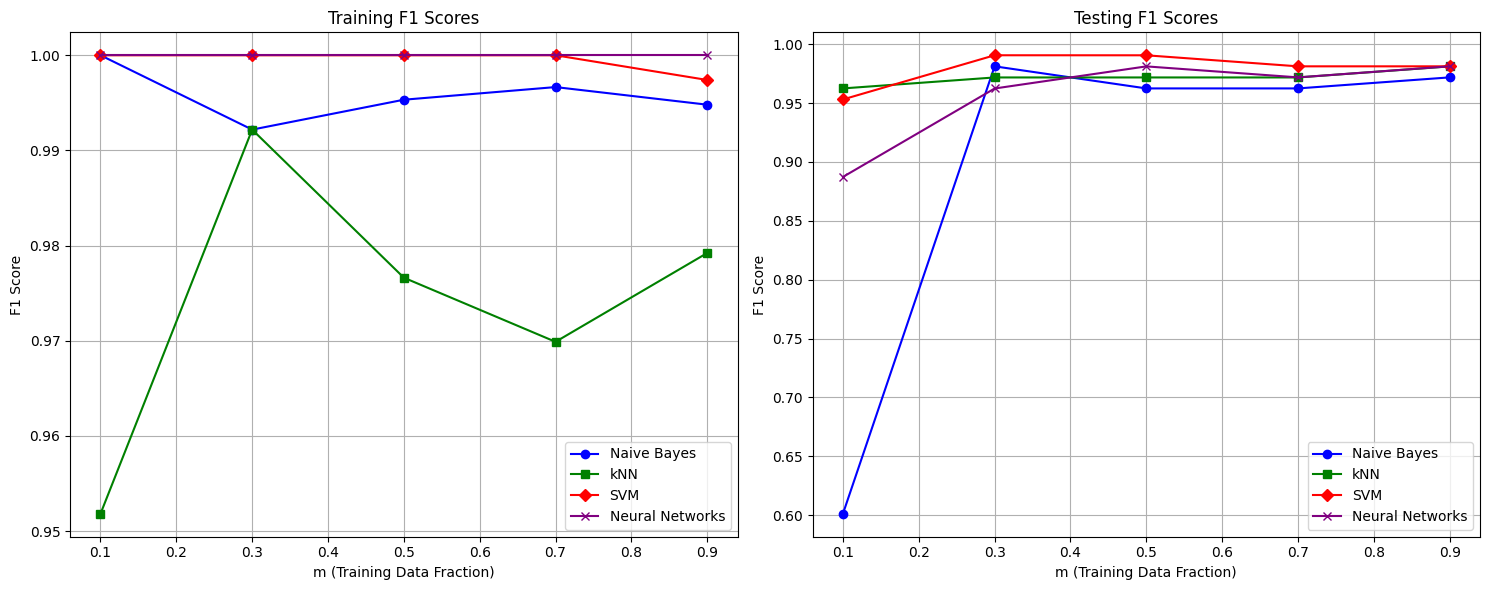

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

m_list = [0.1, 0.3, 0.5, 0.7, 0.9]

def read_data():
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')

    return train_df, test_df

def preprocess_data(train_df, test_df, m: int):
    X_train = train_df['Text']
    y_train = train_df['Category']

    N = len(X_train)
    m_size = int(m*N)
    X_train_m = X_train[:m_size]
    y_train_m = y_train[:m_size]

    X_test = test_df['Text']
    y_test = test_df['Category']

    # Vectorise data
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train_m)
    X_test_vec = vectorizer.transform(X_test)

    return X_train_vec, y_train_m, X_test_vec, y_test

def train_NB(X_vec, y):
    nb = MultinomialNB()
    nb.fit(X_vec, y)

    return nb

def train_kNN(X_vec, y):
    knn = KNeighborsClassifier(n_neighbors=10, metric="euclidean")
    knn.fit(X_vec, y)

    return knn

def train_SVM(X_vec, y):
    svm = SVC(kernel='linear', C=1.0)
    svm.fit(X_vec, y)

    return svm

def train_NN(X_vec, y):
    nn = MLPClassifier(max_iter=1000)
    nn.fit(X_vec, y)

    return nn

def evaluate_model(model, X_train_vec, y_train, X_test_vec, y_test):
    X_train_pred = model.predict(X_train_vec)
    X_test_pred = model.predict(X_test_vec)

    train_f1 = f1_score(y_train, X_train_pred, average='weighted')
    test_f1 = f1_score(y_test, X_test_pred, average='weighted')

    return train_f1, test_f1

def pad_string(string, length=15):
    return string + ' ' * (length - len(string))

def plot_results(m_list, results):
    figure, (plot1, plot2) = plt.subplots(1, 2, figsize=(15, 6))

    colours = ['blue', 'green', 'red', 'purple']
    markers = ['o', 's', 'D', 'x']

    # Training plot
    for _, (name, colour, marker) in enumerate(zip(results.keys(), colours, markers)):
        plot1.plot(m_list, results[name]['train'], color=colour, marker=marker, label=name)

    plot1.set_xlabel('m (Training Data Fraction)')
    plot1.set_ylabel('F1 Score')
    plot1.set_title('Training F1 Scores')
    plot1.legend()
    plot1.grid(True)
    # plot1.set_ylim(0, 1)

    # Testing plot
    for _, (name, colour, marker) in enumerate(zip(results.keys(), colours, markers)):
        plot2.plot(m_list, results[name]['test'], color=colour, marker=marker, label=name)

    plot2.set_xlabel('m (Training Data Fraction)')
    plot2.set_ylabel('F1 Score')
    plot2.set_title('Testing F1 Scores')
    plot2.legend()
    plot2.grid(True)
    # plot2.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

def main():
    train_df, test_df = read_data()

    results = {
        'Naive Bayes': {'train': [], 'test': []},
        'kNN': {'train': [], 'test': []},
        'SVM': {'train': [], 'test': []},
        'Neural Networks': {'train': [], 'test': []}
    }

    for m in m_list:
        # print(f'Processing m = {m}')
        X_train_vec, y_train_m, X_test_vec, y_test = preprocess_data(train_df, test_df, m)

        # Train and evaluate all models
        models = {
            'Naive Bayes': train_NB(X_train_vec, y_train_m),
            'kNN': train_kNN(X_train_vec, y_train_m),
            'SVM': train_SVM(X_train_vec, y_train_m),
            'Neural Networks': train_NN(X_train_vec, y_train_m)
        }

        for name, model in models.items():
            train_f1, test_f1 = evaluate_model(model, X_train_vec, y_train_m, X_test_vec, y_test)
            results[name]['train'].append(train_f1)
            results[name]['test'].append(test_f1)
            # print(f'{pad_string(name)} - Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}')
        # print()

    # Plot results
    plot_results(m_list, results)

main()

## General Trends
### Training Accuracy (Left Plot)
We can see from this plot that there are distinct patterns across the four algorithms.

**SVM (Red) and Neural Networks (Purple):**
 - Maintain consistently high training accuracy (~1.0) across all training data fractions with little variation with changing dataset size

**KNN (Green):**
 - Has unusual fluctuations in accuracy with regards to training dataset size, and shows the most volatile performance

**Naive Bayes (Blue):**
 - Seems to be relatively consistent and insensitive to training dataset size, stabilising around an F1 score of 0.995

### Testing Accuracy (Right Plot)
The testing accuracy provides a clearer insight into generalised performance of each model.

**Neural Networks**:
 - Starts with good initial performance (~0.88) which gradually improves with increased training data, eventually converging to a higher performance (~0.97-0.98)

**KNN (Green) and SVM (Red):**
 - Both exhibity consistently high and stable performance (~0.95-0.99 F1 score) with minimal variation between training dataset sizes
 - Shows the strongest improvement from m = 0.1 to 0.3, and eventually converges to high performance (~0.97-0.98) by m = 0.9

**Naive Bayes (Blue):**
 - Shows the most dramatic improvement with increased data, starting from a ~0.60 F1 score at m = 0.1, and reaching ~0.98 by m = 0.3
 - Naive Bayes stays stable around this level, showing it has the steepest learning curve and highest sensitivity to the training dataset size

